In [2]:
!pip install bixin
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time
import re
!pip install spanish_sentiment_analysis


Defaulting to user installation because normal site-packages is not writeable


In [38]:
import nltk

from nltk.corpus import wordnet as wn
from nltk.corpus import sentiwordnet as swn
from nltk.stem import PorterStemmer
nltk.download('wordnet')
nltk.download('sentiwordnet')


from nltk.sentiment import SentimentIntensityAnalyzer as VADER

!pip install wikiextractor 
from wikiextractor.extract import clean 
from wikiextractor.extract import Extractor 

[nltk_data] Downloading package wordnet to /home/elogomas/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package sentiwordnet to
[nltk_data]     /home/elogomas/nltk_data...
[nltk_data]   Package sentiwordnet is already up-to-date!


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 46 kB 2.7 MB/s  eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [4]:
#read from csv zip files 
haa = pd.read_csv('raw/eng.zip', compression='zip', header=0, sep=',', quotechar='"')
ch = pd.read_csv('raw/zh.zip', compression='zip', header=0, sep=',', quotechar='"')
es = pd.read_csv('raw/es2.zip', compression='zip', header=0, sep=',', quotechar='"')

In [24]:
def check(x): 
    if x[0] != '2': 

        return False 
    return True
haa = haa[haa['time'].apply(check)]
ch = ch[ch['time'].apply(check)]
es = es[es['time'].apply(check)]

In [40]:
#clean eng data 
haa['clean_senti'] = haa['text'].apply(lambda x : clean(Extractor(0, '0', 0), x))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
from nltk.sentiment import SentimentIntensityAnalyzer as VADER
nltk.download('vader_lexicon')
van = VADER()
clean_senti = haa['text'].apply(lambda x : van.polarity_scores(x))

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /home/elogomas/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [25]:
from datetime import datetime
def str_to_datetime(x):
    
    return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')
haa['time'] = haa['time'].apply(str_to_datetime)
ch['time'] = ch['time'].apply(str_to_datetime)
es['time'] = es['time'].apply(str_to_datetime)

In [28]:
from bixin import predict
bixin_csent = ch['text'].apply(lambda x :predict(x))
ch['senti'] = bixin_csent

Building prefix dict from /home/elogomas/.local/lib/python3.7/site-packages/bixin/data/dict.txt.big ...
Dumping model to file cache /tmp/jieba.u52bcbab9b9418cd8ccb0bdc0ad38de26.cache
Loading model cost 1.859 seconds.
Prefix dict has been built succesfully.


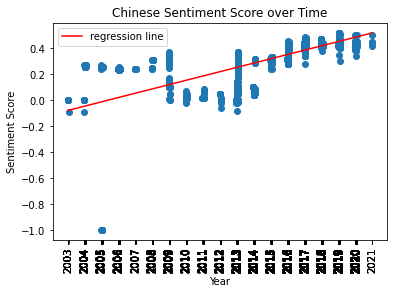

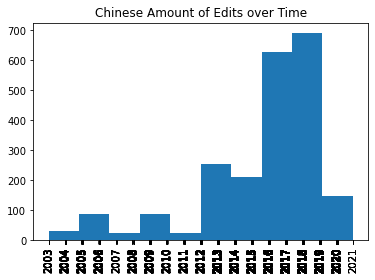

In [53]:
import matplotlib.pyplot as plt
from scipy import stats

def to_integer(dt_time):
    return 10000*dt_time.year + 100*dt_time.month + dt_time.day


x, y = ch['time'].apply(to_integer), bixin_csent
labels = ch['time'].apply(lambda x: x.year)
res = stats.linregress(x, y) 
plt.plot(x, res.intercept + res.slope*x, 'r', label='regression line')
plt.scatter( x, y)
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.title("Chinese Sentiment Score over Time")
plt.xticks(x, labels, rotation='vertical')
plt.legend(loc='upper left')

plt.savefig('zh_sent.png')
plt.show()

plt.hist(x)
plt.title("Chinese Amount of Edits over Time")
plt.xticks(x, labels, rotation='vertical')

plt.savefig('zh_hist.png')

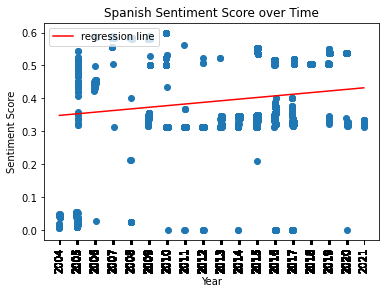

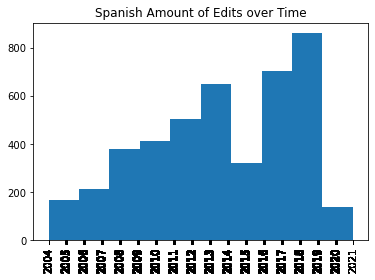

In [54]:
x, y = es['time'].apply(to_integer), es['senti']
res = stats.linregress(x, y) 
labels = es['time'].apply(lambda x: x.year)
plt.plot(x, res.intercept + res.slope*x, 'r', label='regression line')
plt.xlabel("Year")
plt.ylabel("Sentiment Score")
plt.title("Spanish Sentiment Score over Time")
plt.xticks(x, labels, rotation='vertical')
plt.legend(loc='upper left')
plt.scatter( x, y)

plt.savefig('es_sent.png')
plt.show()

plt.hist(x)
plt.title("Spanish Amount of Edits over Time")
plt.xticks(x, labels, rotation='vertical')
plt.savefig('es_hist.png')

In [43]:
test = clean_senti
neg = test.apply(lambda x: x['neg'])
pos = test.apply(lambda x: x['pos'])
neu = test.apply(lambda x: x['neu'])
comp = test.apply(lambda x: x['compound'])
timestamp = haa['time'].apply(lambda x: to_integer(x))

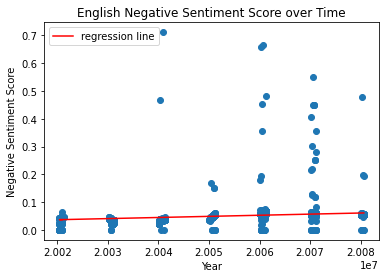

In [90]:
import matplotlib.ticker as ticker
import numpy as np

x, y = timestamp, neg
res = stats.linregress(x, y) 
labels = haa['time'].apply(lambda x: int(x.year))

plt.plot(x, res.intercept + res.slope*x, 'r', label='regression line')

plt.xticks = labels

plt.xlabel("Year")
plt.ylabel("Negative Sentiment Score")
plt.title("English Negative Sentiment Score over Time")
plt.legend(loc='upper left')
plt.scatter( x, y)
plt.savefig('eng_sent_neg.png')
plt.show()

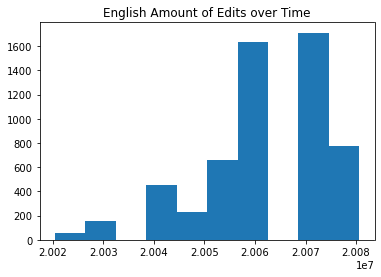

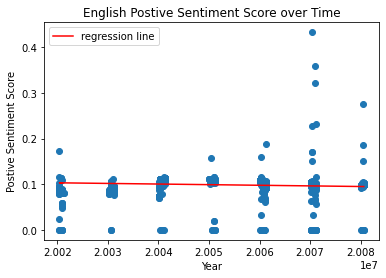

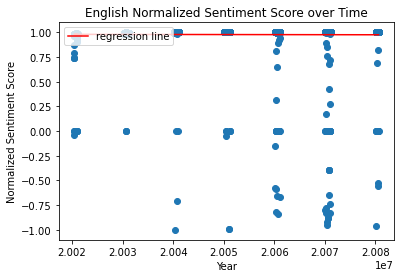

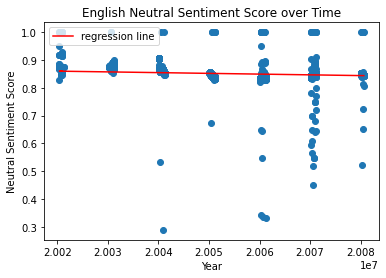

In [93]:


plt.hist(timestamp)
plt.title("English Amount of Edits over Time")

plt.savefig('eng_hist.png')
plt.show()

y=pos
res = stats.linregress(x, y) 
plt.plot(x, res.intercept + res.slope*x, 'r', label='regression line')
plt.xlabel("Year")
plt.ylabel("Postive Sentiment Score")
plt.title("English Postive Sentiment Score over Time")

plt.legend(loc='upper left')
plt.scatter( timestamp, pos)
plt.savefig('eng_sent_pos.png')
plt.show()


y=comp
res = stats.linregress(x, y) 
plt.plot(x, res.intercept + res.slope*x, 'r', label='regression line')
plt.xlabel("Year")
plt.ylabel("Normalized Sentiment Score")
plt.title("English Normalized Sentiment Score over Time")

plt.legend(loc='upper left')
plt.scatter( timestamp, comp)
plt.savefig('eng_sent_norm.png')
plt.show()

y=neu
res = stats.linregress(x, y) 
plt.plot(x, res.intercept + res.slope*x, 'r', label='regression line')
plt.xlabel("Year")
plt.ylabel("Neutral Sentiment Score")
plt.title("English Neutral Sentiment Score over Time")

plt.legend(loc='upper left')
plt.scatter( timestamp, neu)
plt.savefig('eng_sent_neu.png')
plt.show()